# Exploratory Data Analaysis of Spotify Top Tracks from 2017 to 2023
For years, Spotify has been at the forefront of the digital music revolution, providing listeners with access to millions of songs from around the world. One of the most considered features of Spotify’s platform is the Top 50 chart, which ranks the most popular tracks on the platform based on a variety of factors. In this analysis, we will explore the metadata from the top 50 tracks on Spotify from 2017 to 2023, examining the relationships and distributions of the different features to gain insights into what makes a popular song. By analyzing variables such as track length, genre, and tempo and album type, we hope to better understand the music that has shaped our cultural landscape in recent years.

This analysis aims to study the following points:

1. Album Type distribution for the overall period and ranking.
2. Tempo distribution for the overall period and ranking.
3. Duration distribution for the overall period and ranking.
4. Genres distribution for the overall period and ranking.
5. Album Type distribution for the Top 10 tracks in the overall period.
6. Tempo distribution for the Top 10 tracks in the overall period.
7. Duration distribution for the Top 10 tracks in the overall period.
8. Genres distribution for the Top 10 tracks in the overall period and ranking.
9. Correlations for Rank, Tempo and Durations.

## Dataset

The dataset was created from Spotify’s Global Top 50 weekly playlist in the first week of February (from 2017 to 2023) and combined with artist and song metadata extracted using their API with Python scripts. The final dataset contains one table with the following columns:

1. ArtistName: Name of the artist.
2. ArtistGenres: Genres of the artists performing the track. Grouped considering the genres in Every Noise at Once and Chosic.
3. TrackName: Name of the track.
4. TrackTempo: Tempo of the track in BPM.
5. TrackISRC: Track's International Standard Recording Code.
6. TrackDuration: Track duration in seconds.
7. TrackReleaseDate: Date of product release in Spotify.
8. ChartYear: Year where the sample of the chart was taken.
9. ChartRank: Rank of the track in the chart.
10. AlbumName: Name of the product releasead in Spotify.
11. AlbumType: Type of product (album, single, compilation).

## Setup

In [120]:
#IMPORT PACKAGES AND DATASET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


df = pd.read_csv("SpotifyCharts 2017-2023 Final.csv", sep=";")

In [121]:
#Check the dataset
df.head()

,Year,Rank,Change,Track,Album,Unnamed: 5,Album Type,Release Date,Peak Date,7-Day Velocity,Weeks on Chart,ISRC,AudioFeaturesObject.danceability,AudioFeaturesObject.energy,AudioFeaturesObject.key,AudioFeaturesObject.loudness,AudioFeaturesObject.mode,AudioFeaturesObject.speechiness,AudioFeaturesObject.acousticness,AudioFeaturesObject.instrumentalness,AudioFeaturesObject.liveness,AudioFeaturesObject.valence,AudioFeaturesObject.tempo,AudioFeaturesObject.duration_ms,AudioFeaturesObject.time_signature,AudioAnalysisObject.track.duration,AudioAnalysisObject.track.loudness,AudioAnalysisObject.track.tempo,AudioAnalysisObject.track.time_signature,AudioAnalysisObject.track.key,AudioAnalysisObject.track.mode,Unnamed: 31,Artist.1,Artist.2,Artist.3,Artist.4,Artist.5,Artist.6,Artist.7,Genres.1,Genres.2,Genres.3,Genres.4,Genres.5,Genres.6,Genres.7,Genres.8,Genres.9,Genres.10,Genres.11,Genres.12,Genres.13,Genres.14,Genres.15,Genres.16,Genres.17,Genres.18,Genres.19,Genres.20,Genres.21,Genres.22,Genres.23,Genres.1 (grupos),ArtistsIDs Spotify1,ArtistsIDs Spotify2,ArtistsIDs Spotify3,ArtistsIDs Spotify4,ArtistsIDs Spotify5,ArtistsIDs Spotify6,ArtistsIDs Spotify7,Label1,Label2,Label3,Label4
0,2017,1,0,Shape of You,Shape of You,NaN,single,06/01/2017 0:00,19/01/2017 0:00,0.0,8,GBAHS1600463,0.825,0.652,1,-3.183,0,0.0802,0.5810,0.0,0.0931,0.931,95.977,233713,4,233.71265,-3.183,95.977,4,C#,Minor,NaN,Ed Sheeran,NaN,NaN,NaN,NaN,NaN,NaN,pop,uk pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pop,6eUKZXaKkcviH0Ku9w2n3V,NaN,NaN,NaN,NaN,NaN,NaN,Atlantic Records UK,NaN,NaN,NaN
1,2017,2,0,Paris,Paris,NaN,single,13/01/2017 0:00,02/02/2017 0:00,0.0,12,USQX91603031,0.646,0.644,2,-6.763,1,0.0310,0.0243,0.0,0.0888,0.251,99.999,221520,4,221.52000,-6.763,99.999,4,D,Major,NaN,The Chainsmokers,NaN,NaN,NaN,NaN,NaN,NaN,dance pop,edm,electropop,pop,pop dance,tropical house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pop,69GGBxA162lTqCwzJG5jLp,NaN,NaN,NaN,NaN,NaN,NaN,Disruptor Records,Columbia,NaN,NaN
2,2017,5,9,Despacito,Despacito (Featuring Daddy Yankee),NaN,single,13/01/2017 0:00,16/02/2017 0:00,129.0,66,USUM71607007,0.660,0.786,2,-4.757,1,0.1700,0.2090,0.0,0.1120,0.846,177.833,228200,4,228.20000,-4.757,177.833,4,D,Major,NaN,Luis Fonsi,Daddy Yankee,NaN,NaN,NaN,NaN,NaN,latin pop,puerto rican pop,\r\nlatin hip hop,reggaeton,urbano latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin,4V8Sr092TqfHkfAA5fXXqG,4VMYDCV2IEDYJArk749S6m,NaN,NaN,NaN,NaN,NaN,UMLE - Latino,NaN,NaN,NaN
3,2017,8,0,Say You Won't Let Go,Say You Won't Let Go,NaN,album,09/09/2016 0:00,19/01/2017 0:00,0.0,274,DEE861600586,0.358,0.557,10,-7.398,1,0.0590,0.6950,0.0,0.0902,0.494,85.043,211467,4,211.46667,-7.398,85.043,4,A#,Major,NaN,James Arthur,NaN,NaN,NaN,NaN,NaN,NaN,pop,talent show,uk pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pop,4IWBUUAFIplrNtaOHcJPRM,NaN,NaN,NaN,NaN,NaN,NaN,Columbia,NaN,NaN,NaN
4,2017,9,14,Bad and Boujee (feat. Lil Uzi Vert),Bad and Boujee,NaN,album,28/10/2016 0:00,09/02/2017 0:00,NaN,51,QMCE31600796,0.926,0.666,11,-5.314,1,0.2440,0.0611,0.0,0.1230,0.168,127.079,343150,4,343.15040,-5.314,127.079,4,B,Major,NaN,Migos,Lil Uzi Vert,NaN,NaN,NaN,NaN,NaN,atl hip hop,hip hop,pop rap,rap,trap,\r\nmelodic rap,philly rap,rap,trap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hip Hop & Rap,6oMuImdp5ZcFhWP0ESe6mG,4O15NlyKLIASxsJ0PrXPfz,NaN,NaN,NaN,NaN,NaN,300 Entertainment,NaN,NaN,NaN


In [122]:
#Check columns types
print(df.dtypes)
#Set column types
df=df.convert_dtypes()

Year                    int64
Rank                    int64
Change                 object
Track                  object
Album                  object
                        ...  
ArtistsIDs Spotify7    object
Label1                 object
Label2                 object
Label3                 object
Label4                 object
Length: 74, dtype: object


### Data cleaning

1. There are empty columns at the end of the dataset that should be deleted

In [123]:
#Delete last colums
try:
    df = df.drop(columns=["Column1", "_1"])
except KeyError:
    print("Last columns already deleted")

Last columns already deleted


2. Find and Replace Null or NAN values

In [124]:
#Check columns with nulls
for column in df.columns:
    if df[column].isnull().sum()>0:
        print (f"Column: {column} | NAN/Null found: {df[column].isnull().sum()}")
        #Drop the column if its 100% NaN (completely empty/NaN)
        if df[column].isnull().sum()==len(df[column]):
            print(f"Dropped {column}")
            df=df.drop(columns=[column])
        else:
            #Replace NANA for empty or 0 if its a number
            try:
                pd.to_numeric(df[column])
                df[column].fillna(0, inplace=True)
            except ValueError:
                df[column].fillna("", inplace=True)
df.head()

Column: Unnamed: 5 | NAN/Null found: 350
Dropped Unnamed: 5
Column: 7-Day Velocity | NAN/Null found: 23
Column: Unnamed: 31 | NAN/Null found: 350
Dropped Unnamed: 31
Column: Artist.2 | NAN/Null found: 193
Column: Artist.3 | NAN/Null found: 315
Column: Artist.4 | NAN/Null found: 342
Column: Artist.5 | NAN/Null found: 346
Column: Artist.6 | NAN/Null found: 349
Column: Artist.7 | NAN/Null found: 349
Column: Genres.1 | NAN/Null found: 1
Column: Genres.2 | NAN/Null found: 30
Column: Genres.3 | NAN/Null found: 90
Column: Genres.4 | NAN/Null found: 148
Column: Genres.5 | NAN/Null found: 185
Column: Genres.6 | NAN/Null found: 216
Column: Genres.7 | NAN/Null found: 248
Column: Genres.8 | NAN/Null found: 267
Column: Genres.9 | NAN/Null found: 286
Column: Genres.10 | NAN/Null found: 302
Column: Genres.11 | NAN/Null found: 310
Column: Genres.12 | NAN/Null found: 321
Column: Genres.13 | NAN/Null found: 324
Column: Genres.14 | NAN/Null found: 328
Column: Genres.15 | NAN/Null found: 332
Column: Genre

,Year,Rank,Change,Track,Album,Album Type,Release Date,Peak Date,7-Day Velocity,Weeks on Chart,ISRC,AudioFeaturesObject.danceability,AudioFeaturesObject.energy,AudioFeaturesObject.key,AudioFeaturesObject.loudness,AudioFeaturesObject.mode,AudioFeaturesObject.speechiness,AudioFeaturesObject.acousticness,AudioFeaturesObject.instrumentalness,AudioFeaturesObject.liveness,AudioFeaturesObject.valence,AudioFeaturesObject.tempo,AudioFeaturesObject.duration_ms,AudioFeaturesObject.time_signature,AudioAnalysisObject.track.duration,AudioAnalysisObject.track.loudness,AudioAnalysisObject.track.tempo,AudioAnalysisObject.track.time_signature,AudioAnalysisObject.track.key,AudioAnalysisObject.track.mode,Artist.1,Artist.2,Artist.3,Artist.4,Artist.5,Artist.6,Artist.7,Genres.1,Genres.2,Genres.3,Genres.4,Genres.5,Genres.6,Genres.7,Genres.8,Genres.9,Genres.10,Genres.11,Genres.12,Genres.13,Genres.14,Genres.15,Genres.16,Genres.17,Genres.18,Genres.19,Genres.20,Genres.21,Genres.22,Genres.23,Genres.1 (grupos),ArtistsIDs Spotify1,ArtistsIDs Spotify2,ArtistsIDs Spotify3,ArtistsIDs Spotify4,ArtistsIDs Spotify5,ArtistsIDs Spotify6,ArtistsIDs Spotify7,Label1,Label2,Label3,Label4
0,2017,1,0,Shape of You,Shape of You,single,06/01/2017 0:00,19/01/2017 0:00,0,8,GBAHS1600463,0.825,0.652,1,-3.183,0,0.0802,0.581,0.0,0.0931,0.931,95.977,233713,4,233.71265,-3.183,95.977,4,C#,Minor,Ed Sheeran,,,,,,,pop,uk pop,,,,,,,,,,,,,,,,,,,,,,Pop,6eUKZXaKkcviH0Ku9w2n3V,,,,,,,Atlantic Records UK,,,
1,2017,2,0,Paris,Paris,single,13/01/2017 0:00,02/02/2017 0:00,0,12,USQX91603031,0.646,0.644,2,-6.763,1,0.031,0.0243,0.0,0.0888,0.251,99.999,221520,4,221.52,-6.763,99.999,4,D,Major,The Chainsmokers,,,,,,,dance pop,edm,electropop,pop,pop dance,tropical house,,,,,,,,,,,,,,,,,,Pop,69GGBxA162lTqCwzJG5jLp,,,,,,,Disruptor Records,Columbia,,
2,2017,5,9,Despacito,Despacito (Featuring Daddy Yankee),single,13/01/2017 0:00,16/02/2017 0:00,129,66,USUM71607007,0.66,0.786,2,-4.757,1,0.17,0.209,0.0,0.112,0.846,177.833,228200,4,228.2,-4.757,177.833,4,D,Major,Luis Fonsi,Daddy Yankee,,,,,,latin pop,puerto rican pop,latin hip hop,reggaeton,urbano latino,,,,,,,,,,,,,,,,,,,Latin,4V8Sr092TqfHkfAA5fXXqG,4VMYDCV2IEDYJArk749S6m,,,,,,UMLE - Latino,,,
3,2017,8,0,Say You Won't Let Go,Say You Won't Let Go,album,09/09/2016 0:00,19/01/2017 0:00,0,274,DEE861600586,0.358,0.557,10,-7.398,1,0.059,0.695,0.0,0.0902,0.494,85.043,211467,4,211.46667,-7.398,85.043,4,A#,Major,James Arthur,,,,,,,pop,talent show,uk pop,,,,,,,,,,,,,,,,,,,,,Pop,4IWBUUAFIplrNtaOHcJPRM,,,,,,,Columbia,,,
4,2017,9,14,Bad and Boujee (feat. Lil Uzi Vert),Bad and Boujee,album,28/10/2016 0:00,09/02/2017 0:00,0,51,QMCE31600796,0.926,0.666,11,-5.314,1,0.244,0.0611,0.0,0.123,0.168,127.079,343150,4,343.1504,-5.314,127.079,4,B,Major,Migos,Lil Uzi Vert,,,,,,atl hip hop,hip hop,pop rap,rap,trap,melodic rap,philly rap,rap,trap,,,,,,,,,,,,,,,Hip Hop & Rap,6oMuImdp5ZcFhWP0ESe6mG,4O15NlyKLIASxsJ0PrXPfz,,,,,,300 Entertainment,,,


### Rank vs Album type 


<AxesSubplot:ylabel='Album Type'>

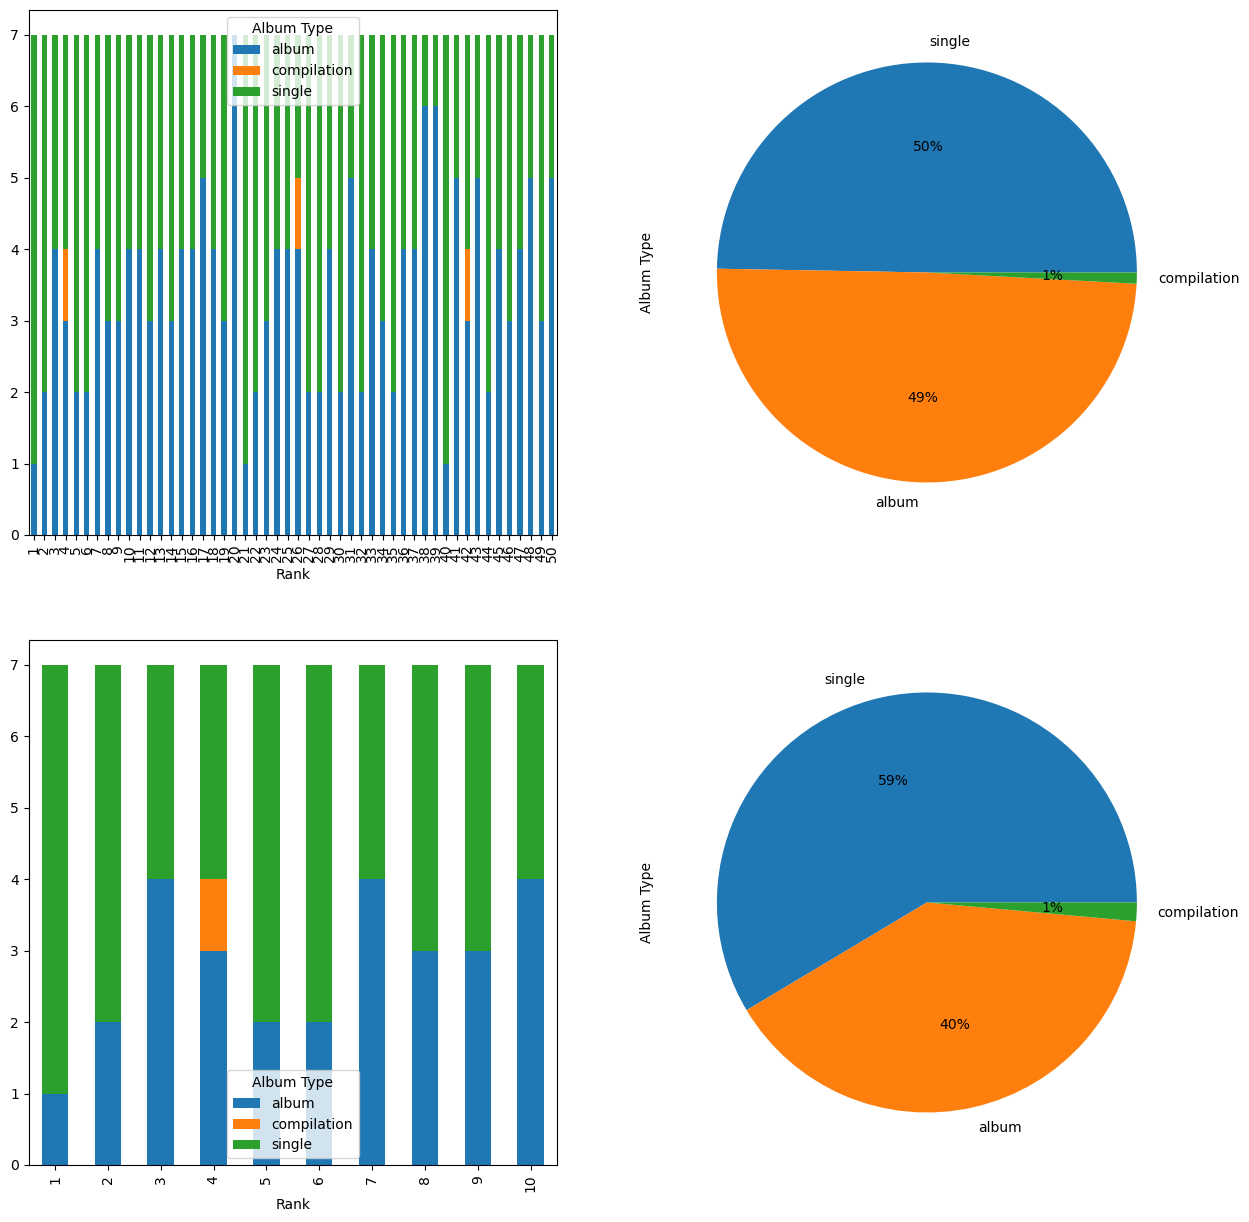

In [125]:
#Group by Rank
grouped_rank=df.groupby('Rank')["Album Type"]
#Prepare plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
#Stacked chart General
grouped_rank.value_counts().unstack().plot(kind='bar', stacked=True, ax=axes[0,0])
#Pie chart General
df["Album Type"].value_counts().plot(kind="pie", y=df["Album Type"].value_counts(),autopct="%.0f%%", ax=axes[0,1])
#Group by Rank Top 10
grouped_rank_top=df[df["Rank"]<=10].groupby('Rank')["Album Type"]
#Stacked chart Top 10
grouped_rank_top.value_counts().unstack().plot(kind='bar', stacked=True, ax=axes[1,0])
#Pie chart Top 10
df[df["Rank"]<=10]["Album Type"].value_counts().plot(kind="pie", y=df["Album Type"].value_counts(),autopct="%.0f%%", ax=axes[1,1])

### Rank vs Tempo


<AxesSubplot:xlabel='Rank'>

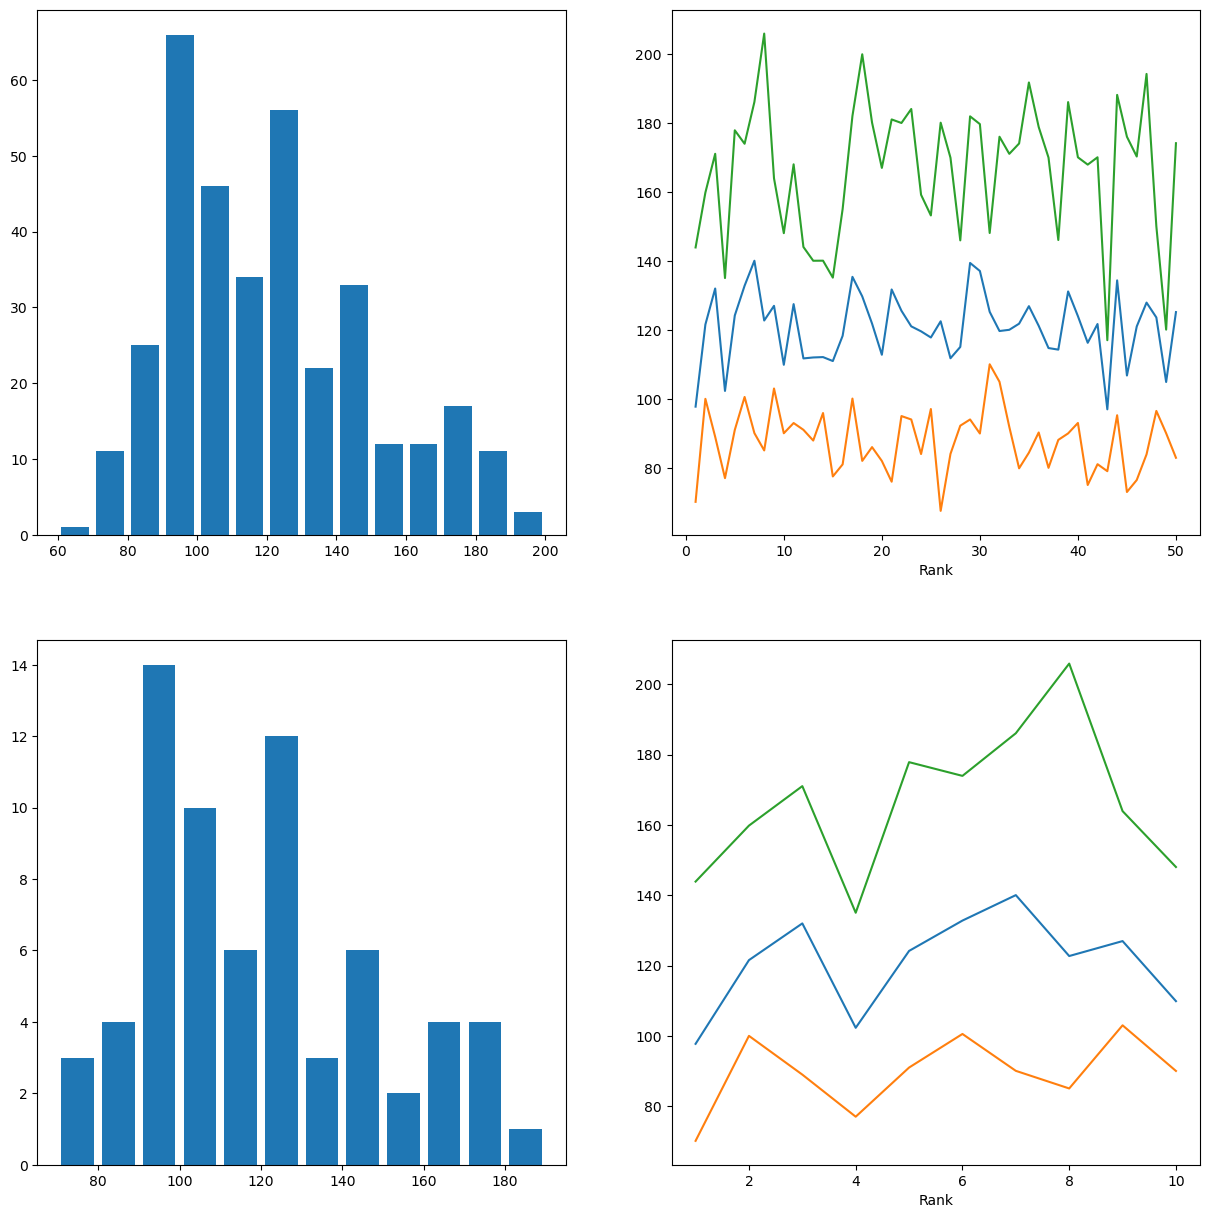

In [126]:
#Group by Rank
df["AudioFeaturesObject.tempo"]=df["AudioFeaturesObject.tempo"].astype(float)
grouped_rank=df.groupby('Rank')["AudioFeaturesObject.tempo"]
#Prepare plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
#Histogram General
axes[0,0].hist(df["AudioFeaturesObject.tempo"], rwidth=0.8, bins=range(60,210,10))
#Ranking Plot General
grouped_rank.mean().plot(ax=axes[0,1])
grouped_rank.min().plot(ax=axes[0,1])
grouped_rank.max().plot(ax=axes[0,1])
#Group by Rank Top 10
grouped_rank_top=df[df["Rank"]<=10].groupby('Rank')["AudioFeaturesObject.tempo"]
#Histogram General
axes[1,0].hist(df[df["Rank"]<=10]["AudioFeaturesObject.tempo"], rwidth=0.8, bins=range(70,200,10))
#Ranking Plot General
grouped_rank_top.mean().plot(ax=axes[1,1])
grouped_rank_top.min().plot(ax=axes[1,1])
grouped_rank_top.max().plot(ax=axes[1,1])

### Rank vs Duration

<AxesSubplot:xlabel='Rank'>

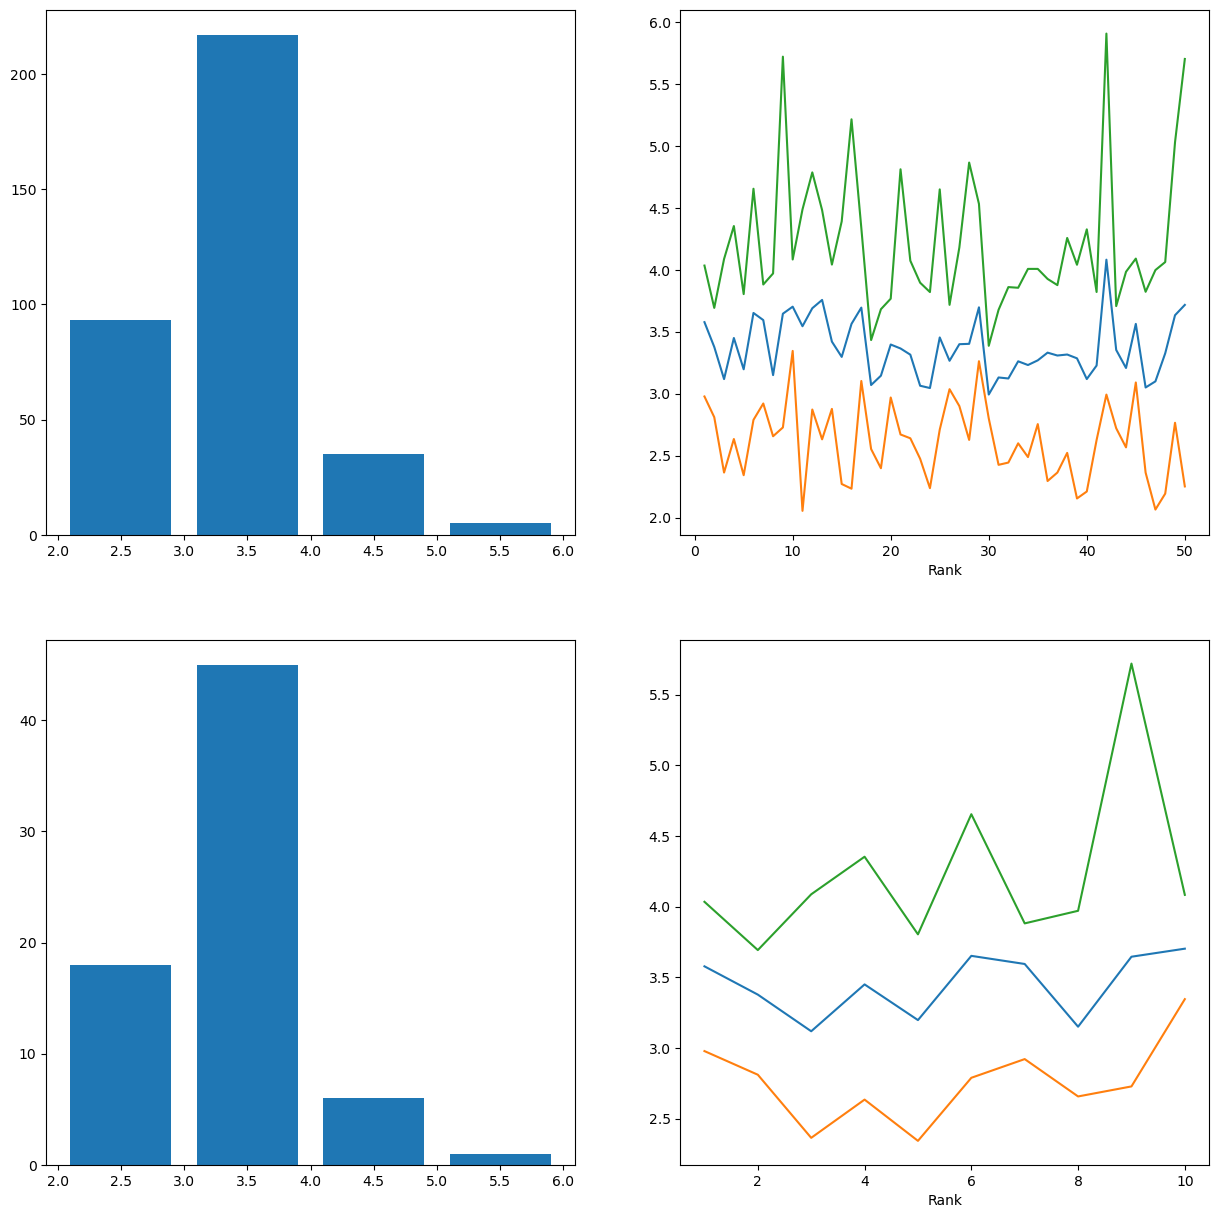

In [127]:
#Group by Rank
df["AudioAnalysisObject.track.duration_min"]=df["AudioAnalysisObject.track.duration"].transform(lambda x: float(x))/60 # in mins
grouped_rank=df.groupby('Rank')["AudioAnalysisObject.track.duration_min"]
#Prepare plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
#Histogram General
axes[0,0].hist(df["AudioAnalysisObject.track.duration_min"], rwidth=0.8, bins=range(2,7,1))
#Ranking Plot General
grouped_rank.mean().plot(ax=axes[0,1])
grouped_rank.min().plot(ax=axes[0,1])
grouped_rank.max().plot(ax=axes[0,1])
#Group by Rank Top 10
grouped_rank_top=df[df["Rank"]<=10].groupby('Rank')["AudioAnalysisObject.track.duration_min"]
#Histogram Top 10
axes[1,0].hist(df[df["Rank"]<=10]["AudioAnalysisObject.track.duration_min"], rwidth=0.8, bins=range(2,7,1))
#Ranking Plot Top 10
grouped_rank_top.mean().plot(ax=axes[1,1])
grouped_rank_top.min().plot(ax=axes[1,1])
grouped_rank_top.max().plot(ax=axes[1,1])

In [128]:
### Rank vs Genres

<AxesSubplot:xlabel='Genres.1 (grupos)'>

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


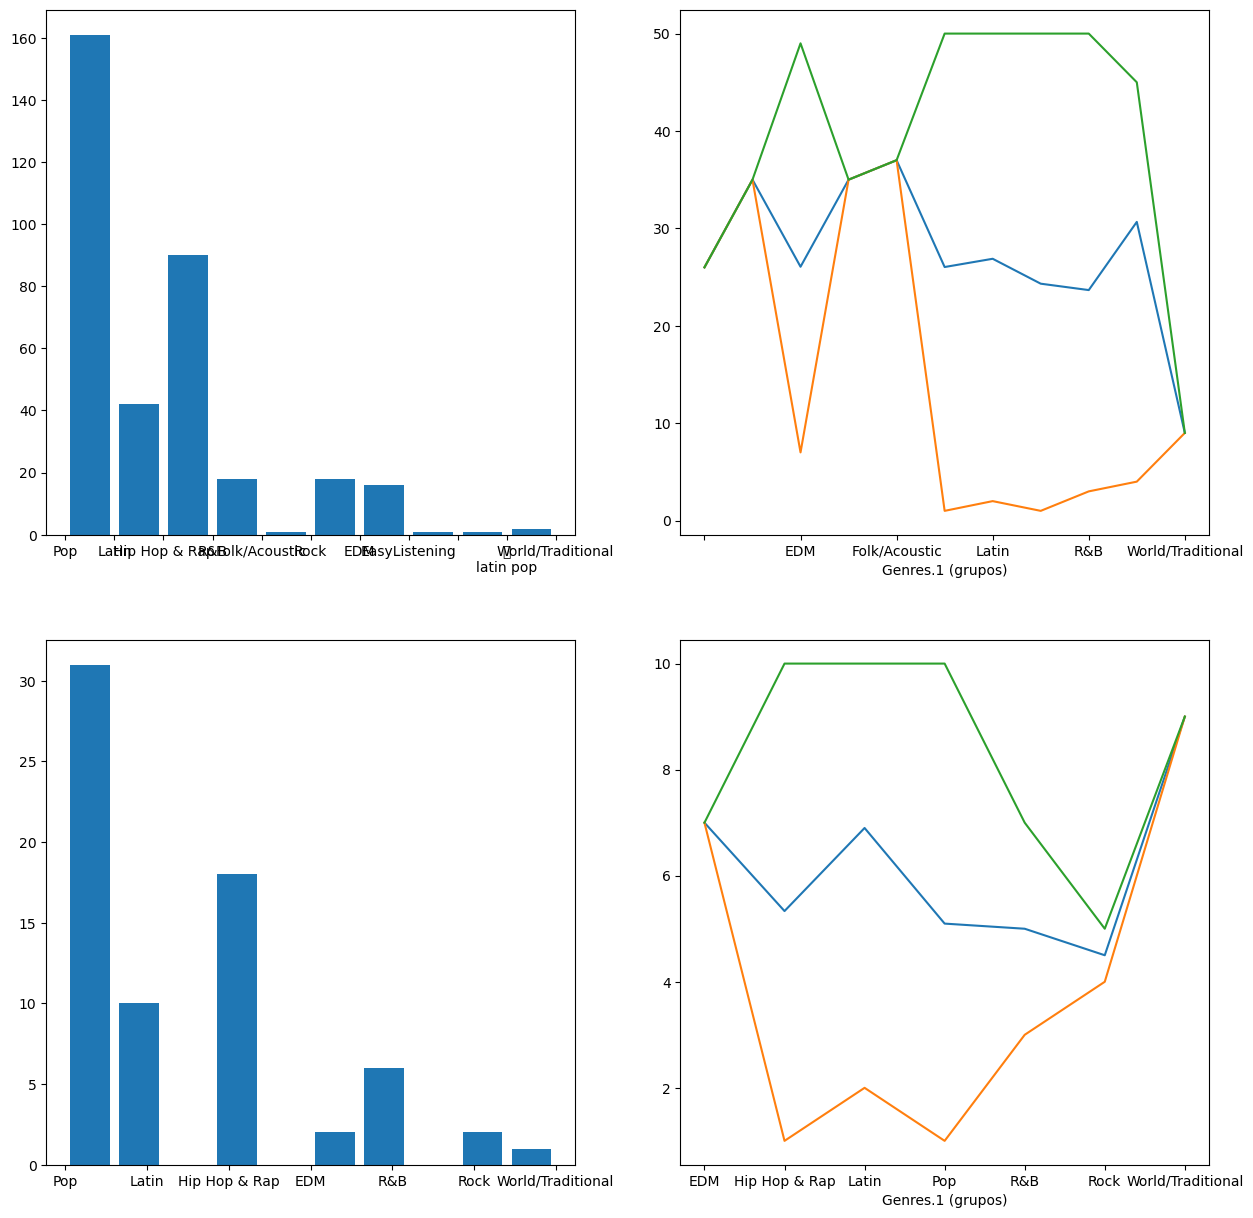

In [129]:
#Group by Rank
grouped_rank=df.groupby("Genres.1 (grupos)")["Rank"]
#Prepare plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
#Histogram General
axes[0,0].hist(df["Genres.1 (grupos)"], rwidth=0.8)
#Ranking Plot General
grouped_rank.mean().plot(ax=axes[0,1])
grouped_rank.min().plot(ax=axes[0,1])
grouped_rank.max().plot(ax=axes[0,1])
#Group by Rank Top 10
grouped_rank_top=df[df["Rank"]<=10].groupby('Genres.1 (grupos)')["Rank"]
#Histogram Top 10
axes[1,0].hist(df[df["Rank"]<=10]["Genres.1 (grupos)"], rwidth=0.8)
#Ranking Plot Top 10
grouped_rank_top.mean().plot(ax=axes[1,1])
grouped_rank_top.min().plot(ax=axes[1,1])
grouped_rank_top.max().plot(ax=axes[1,1])


## Correlations

In [130]:
#Number columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numbers_df = df.select_dtypes(include=numerics)
numbers_df.head()

,Year,Rank,7-Day Velocity,Weeks on Chart,AudioFeaturesObject.danceability,AudioFeaturesObject.energy,AudioFeaturesObject.key,AudioFeaturesObject.loudness,AudioFeaturesObject.mode,AudioFeaturesObject.speechiness,AudioFeaturesObject.acousticness,AudioFeaturesObject.instrumentalness,AudioFeaturesObject.liveness,AudioFeaturesObject.valence,AudioFeaturesObject.tempo,AudioFeaturesObject.duration_ms,AudioFeaturesObject.time_signature,AudioAnalysisObject.track.duration,AudioAnalysisObject.track.loudness,AudioAnalysisObject.track.tempo,AudioAnalysisObject.track.time_signature,AudioAnalysisObject.track.duration_min
0,2017,1,0,8,0.825,0.652,1,-3.183,0,0.0802,0.581,0.0,0.0931,0.931,95.977,233713,4,233.71265,-3.183,95.977,4,3.895211
1,2017,2,0,12,0.646,0.644,2,-6.763,1,0.031,0.0243,0.0,0.0888,0.251,99.999,221520,4,221.52,-6.763,99.999,4,3.692000
2,2017,5,129,66,0.66,0.786,2,-4.757,1,0.17,0.209,0.0,0.112,0.846,177.833,228200,4,228.2,-4.757,177.833,4,3.803333
3,2017,8,0,274,0.358,0.557,10,-7.398,1,0.059,0.695,0.0,0.0902,0.494,85.043,211467,4,211.46667,-7.398,85.043,4,3.524444
4,2017,9,0,51,0.926,0.666,11,-5.314,1,0.244,0.0611,0.0,0.123,0.168,127.079,343150,4,343.1504,-5.314,127.079,4,5.719173


In [131]:
numbers_df.corr()["Rank"]

Year                                       -1.210122e-14
Rank                                        1.000000e+00
7-Day Velocity                             -1.229466e-01
Weeks on Chart                             -7.250175e-02
AudioFeaturesObject.danceability           -8.335268e-02
AudioFeaturesObject.energy                 -6.742693e-02
AudioFeaturesObject.key                     4.725438e-02
AudioFeaturesObject.loudness               -2.500937e-02
AudioFeaturesObject.mode                   -4.185175e-03
AudioFeaturesObject.speechiness             1.835916e-02
AudioFeaturesObject.acousticness            3.155423e-02
AudioFeaturesObject.instrumentalness       -4.899227e-02
AudioFeaturesObject.liveness               -1.403826e-02
AudioFeaturesObject.valence                -5.454301e-02
AudioFeaturesObject.tempo                  -4.859046e-03
AudioFeaturesObject.duration_ms            -5.658890e-02
AudioFeaturesObject.time_signature         -5.802612e-02
AudioAnalysisObject.track.durat